<!-- PROJECT LOGO -->
<br />
<div align="center">
  <a>
    <img src="https://res.cloudinary.com/dek4evg4t/image/upload/v1725844901/Group_2.png" alt="Logo" width="40%">
  </a>
</div>


<!-- TABLE OF CONTENTS -->
<details>
  <summary>Table of Contents</summary>
  <ol>
    <li><a href="">pending...</a></li>
    <li><a href="">pending...</a></li>
  </ol>
</details>


### 🖹 Descripción: 
Este proyecto tiene como objetivo principal aplicar diversas técnicas de clasificación de datos en dos conjuntos de datos diferentes, permitiendo explorar herramientas avanzadas de Machine Learning y contribuir al desarrollo del conocimiento a través de la investigación.

El primer conjunto de datos proviene del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales, y su finalidad es predecir de manera diagnóstica si un paciente tiene diabetes, basándose en un conjunto de mediciones realizadas. Enlace: [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).

El segundo conjunto de datos, titulado [Alzheimer Features](https://www.kaggle.com/datasets/brsdincer/alzheimer-features), está enfocado en la clasificación binaria de pacientes con Alzheimer. Este conjunto fue seleccionado por su relevancia en la predicción de enfermedades neurológicas, utilizando datos tabulares para la creación de modelos diagnósticos eficaces. La elección de este conjunto se basa en su capacidad para enriquecer el análisis comparativo entre diferentes patologías, lo que permite profundizar en la aplicación de técnicas de clasificación en distintos contextos médicos.


### ✍️ Autores: 
* Angelo Ortiz Vega - [@angelortizv](https://github.com/angelortizv)
* Alejandro Campos Abarca - [@MajinLoop](https://github.com/MajinLoop)

### 🖹 Fecha: 
12 de septiembre de 2024

### Notas
- Asegurarse de que Python esté instalado, junto con las bibliotecas necesarias: pandas, numpy, matplotlib, seaborn, scipy, ydata_profiling, utils.
- Los conjuntos de datos Iris debe colocarse en el directorio en el mismo directorio con el nombre 'iris.csv'.


# 1. Importación de Librerías

In [6]:
import sys
import os
from pathlib import Path

import numpy as np
import pandas as pd
from scipy import stats

from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport
from IPython.display import display, HTML

from enum import Enum
import random

import Utils as U
import importlib
importlib.reload(U)

<module 'Utils' from 'C:\\Users\\PC MASTER\\Desktop\\ic6200\\proyectos\\IC6200_AI_P1\\src\\Utils.py'>

# 2. Definición de Constantes

In [14]:
FILENAME_D = "./data/diabetes.csv"
FILENAME_A = "./data/alzheimer.csv"

SHUFFLE_SEED = 153
COLOR_SEED = 666
PD_MAX_ROWS = 10
PD_MAX_WIDTH = 400

TRAINING_CUT = 0.7 # 70%
SCIKIT_LEARN_RANDOM_STATE = 73

# 3. Configuración ploteo pandas

In [19]:
pd.set_option('display.max_rows', PD_MAX_ROWS)
pd.set_option('display.width', PD_MAX_WIDTH)

pd.set_option('future.no_silent_downcasting', True)

# 4. Definición de funciones auxiliares

In [9]:
def print_column_types(df):
    print("Column types:")
    for column in df.columns:
        col_name = column.ljust(30)
        col_type = df[column].dtype
        print(f"{col_name} {col_type}")

def print_scores(y_true, y_pred):
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Presition
    precision = precision_score(y_true, y_pred)
    print(f"Precision: {precision:.2f}")
    
    # Recall
    recall = recall_score(y_true, y_pred)
    print(f"Recall: {recall:.2f}")

    # Calcular F1 Score
    f1 = f1_score(y_true, y_pred)
    print(f"F1 Score: {f1:.2f}")

    print()

# 5. Definición de estructuras auxiliares

In [10]:
class Custom_Dataframe:
    def __init__(self, name, df, tag_col_name, features_col_names):
        # Constructor de la clase
        self.name = name
        self.df = df
        self.tag_col_name = tag_col_name
        self.features_col_names = features_col_names

    def print_unique_tags(self):
        tags = self.df[self.tag_col_name].unique()
        print(f"Tags: {tags}")

    def replace_col_values(self, replace_dict, col_name):
        df = self.df
        df[col_name] = df[col_name].replace(replace_dict)

    def reduce_dimesionality(self, columns_to_keep):
        # U.printt("self.features_col_names", self.features_col_names)
        # U.printt("columns_to_keep", columns_to_keep)
        self.df = self.df[columns_to_keep]
        columns_to_keep.remove(self.tag_col_name)
        self.features_col_names = columns_to_keep

    def show(self):
        print(self.name)
        print(self.df)

        # Check types
        print_column_types(self.df)

        print()

        # Check unique tags
        self.print_unique_tags()        
        print()
        print()

    def print_tags_balance(self):
        print(self.name)
        total_rows = self.df.shape[0]
        print(f"Total rows = {total_rows}")
        tags = self.df[self.tag_col_name].unique()
        for tag in tags:
            count = self.df[self.df[self.tag_col_name] == tag].shape[0]
            percentage = 100 * count / total_rows
            formatted_percentage = "{:.2f}".format(percentage)
            print(f"Tag: {tag} -> {count} Rows ({formatted_percentage}%)")


class CYBERPUNK_COLORS(Enum):
    Red             = "#e74150"
    Yellow          = "#fee801"
    Green           = "#00ff9f"
    Dark_Blue       = "#005678"
    Night           = "#01012b"
    Cyan            = "#00ffe3"
    Red_Fuchsia     = "#ff1e61"
    Pink_Fuchsia    = "#ff008d"

    @classmethod
    def get_random_color(self, seed):
        random.seed(seed)        
        color_list = list(CYBERPUNK_COLORS)        
        selected_color = random.choice(color_list)
        return selected_color.value

class SEABORN_COLORMAPS(Enum):
    Viridis         = "viridis"
    Plasma          = "plasma"
    Inferno         = "inferno"
    Magma           = "magma"
    Cividis         = "cividis"
    Blues           = "Blues"
    Greens          = "Greens"
    Reds            = "Reds"
    Coolwarm        = "coolwarm"
    Spectral        = "Spectral"
    RdYlBu          = "RdYlBu"
    RdBu            = "RdBu"
    PiYG            = "PiYG"
    PRGn            = "PRGn"
    BrBG            = "BrBG"

    @classmethod
    def get_random_colormap(cls, seed=None):
        if seed is not None:
            random.seed(seed)        
        colormap_list = list(SEABORN_COLORMAPS)        
        selected_colormap = random.choice(colormap_list)
        return selected_colormap.value

# 6. Creación del dataframe principal

In [15]:
# https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
# https://www.kaggle.com/datasets/brsdincer/alzheimer-features

def gen_cdf(filename, tag_col_name):
    filepath = Path(filename)

    # Checks read and the file
    if filepath.is_file():
        # Read .csv
        df = pd.read_csv(filepath)
        # Get non-tag columns
        features_col_names = [col for col in df.columns if col != tag_col_name]

        # Dataframe is shuffled to ease bias
        df = df.sample(frac=1, random_state=SHUFFLE_SEED).reset_index(drop=True)

        # Create Dataframe class instance
        cdf = Custom_Dataframe(filename, df, tag_col_name, features_col_names)
        cdf.show()

        return cdf
    else:
        print(f"Need the file named: {filename}")

cdfd = gen_cdf(FILENAME_D, "Outcome")
cdfa = gen_cdf(FILENAME_A, "Group")

./data/diabetes.csv
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0              0      119              0              0        0  32.4                     0.141   24        1
1              1       97             64             19       82  18.2                     0.299   21        0
2              0      180             66             39        0  42.0                     1.893   25        1
3              5      136             82              0        0   0.0                     0.640   69        0
4              0      113             76              0        0  33.3                     0.278   23        1
..           ...      ...            ...            ...      ...   ...                       ...  ...      ...
763           14      175             62             30        0  33.6                     0.212   38        1
764            0      113             80             16        0  31.0                     0

# 7. Manipulación de datos

## 7.1. Manejo de valores de tags 

En este caso se eliminaron las filas del dataset "Alzheimer" con la etiqueta "Convertido".

In [17]:
cdfa.df = cdfa.df[cdfa.df['Group'] != 'Converted']
cdfa.show()

./data/alzheimer.csv
           Group M/F  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
0       Demented   M   81    20  1.0  26.0  0.5  1556  0.691  1.128
1    Nondemented   M   85    12  3.0  30.0  0.0  1820  0.755  0.964
2    Nondemented   F   60    18  1.0  30.0  0.0  1402  0.822  1.252
4       Demented   F   73    13  2.0  23.0  0.5  1536  0.725  1.142
6       Demented   F   75    13  2.0  28.0  0.5  1520  0.708  1.155
..           ...  ..  ...   ...  ...   ...  ...   ...    ...    ...
368  Nondemented   F   84    16  3.0  28.0  0.0  1500  0.744  1.170
369  Nondemented   M   74    18  1.0  29.0  0.0  1814  0.679  0.967
370     Demented   M   70    16  3.0  29.0  0.5  1463  0.749  1.200
371  Nondemented   F   70    14  3.0  29.0  0.0  1524  0.787  1.151
372  Nondemented   F   77    16  2.0  29.0  0.0  1433  0.723  1.225

[336 rows x 10 columns]
Column types:
Group                          object
M/F                            object
Age                            int64
EDUC       

## 7.2. Convertir las columnas del dataframe

Para la mayoría de los modelos, es necesario que los valores sean numéricos.

In [20]:
cdfa.replace_col_values({'Nondemented': 0, 'Demented': 1}, cdfa.tag_col_name)
cdfa.replace_col_values({'F': 0, 'M': 1}, "M/F")
cdfa.show()

./data/alzheimer.csv
     Group  M/F  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
0        1    1   81    20  1.0  26.0  0.5  1556  0.691  1.128
1        0    1   85    12  3.0  30.0  0.0  1820  0.755  0.964
2        0    0   60    18  1.0  30.0  0.0  1402  0.822  1.252
4        1    0   73    13  2.0  23.0  0.5  1536  0.725  1.142
6        1    0   75    13  2.0  28.0  0.5  1520  0.708  1.155
..     ...  ...  ...   ...  ...   ...  ...   ...    ...    ...
368      0    0   84    16  3.0  28.0  0.0  1500  0.744  1.170
369      0    1   74    18  1.0  29.0  0.0  1814  0.679  0.967
370      1    1   70    16  3.0  29.0  0.5  1463  0.749  1.200
371      0    0   70    14  3.0  29.0  0.0  1524  0.787  1.151
372      0    0   77    16  2.0  29.0  0.0  1433  0.723  1.225

[336 rows x 10 columns]
Column types:
Group                          int64
M/F                            int64
Age                            int64
EDUC                           int64
SES                            float

## 7.3. Revisión de clases

Se verifican si las clases son adecuadas para la regresión logísticas y si están equilibradas.

In [21]:
cdfd.print_tags_balance()
print()
cdfa.print_tags_balance()

./data/diabetes.csv
Total rows = 768
Tag: 1 -> 268 Rows (34.90%)
Tag: 0 -> 500 Rows (65.10%)

./data/alzheimer.csv
Total rows = 336
Tag: 1 -> 146 Rows (43.45%)
Tag: 0 -> 190 Rows (56.55%)


Ahora es posible realizar una regresión logística ya que las etiquetas son solo 0 o 1. Sin embargo, las clases en el marco de datos "Diabetes" no están equilibradas.

# 8. Exploratory Data Analysis (EDA)

## 8.1 Gráficos de barras de características agrupadas por diabetes

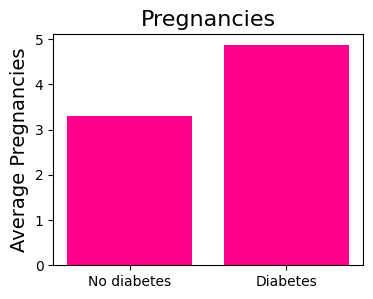

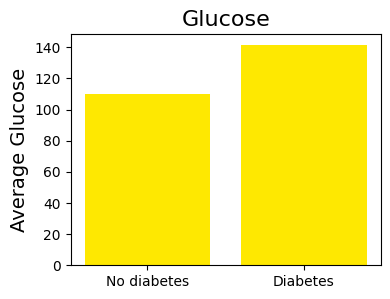

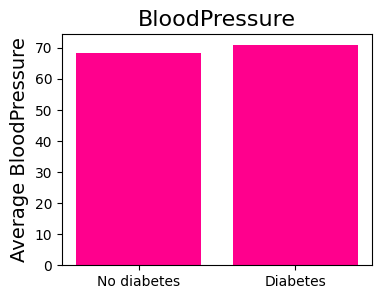

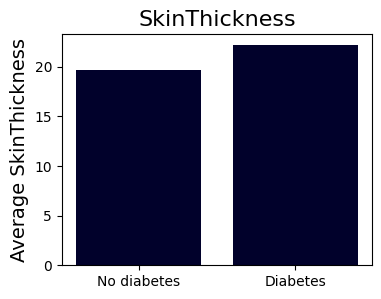

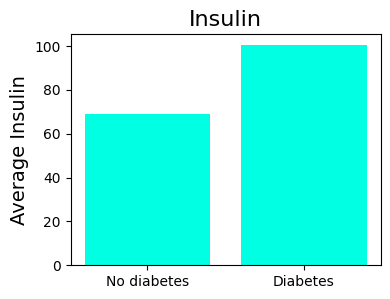

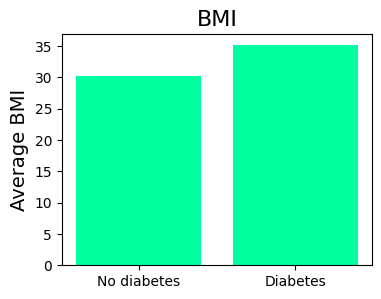

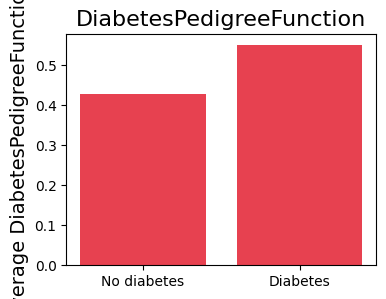

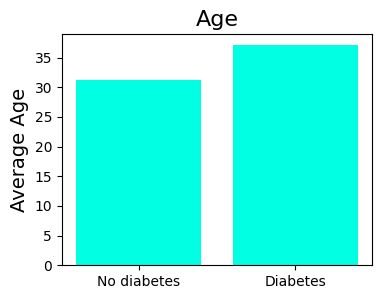

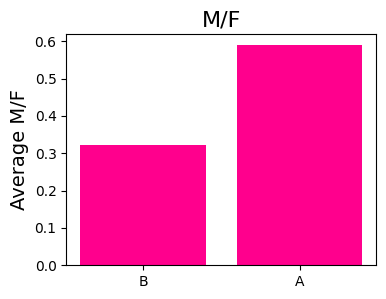

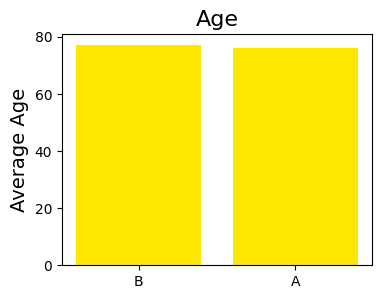

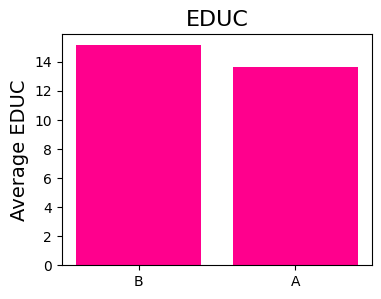

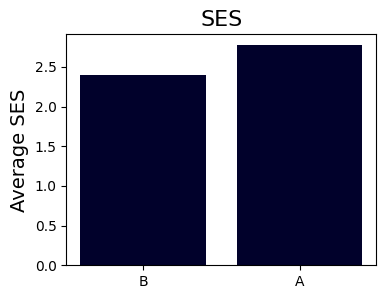

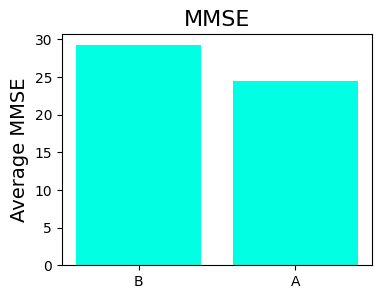

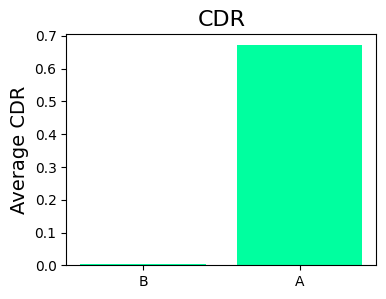

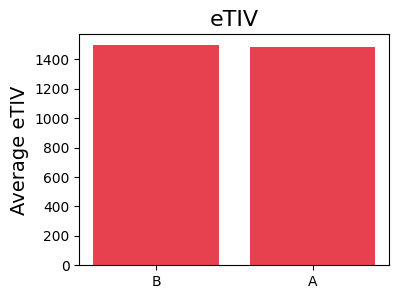

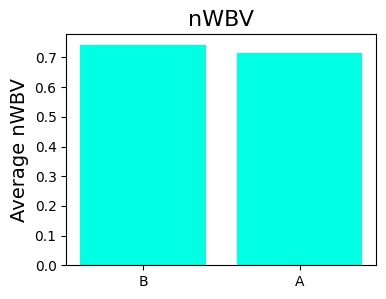

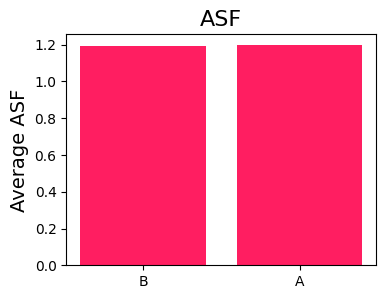

In [26]:
def plot_all_bar(cdf, xticks_labels=[]):
    color_counter = 0
    for feature in cdf.features_col_names:
        ys = []
        tags = cdf.df[cdf.tag_col_name].unique()
        for tag in tags:
            subdf = cdf.df[cdf.df[cdf.tag_col_name] == tag][[feature]]

            mean = subdf.mean().iloc[0]
            std = subdf.std().iloc[0]
            ys.append(mean)

        color = COLOR_SEED + color_counter
        if xticks_labels != []:
            U.plt_bar(categories=tags,
                      magnitudes=ys,
                      fig_width=4,
                      fig_height=3,
                      color=CYBERPUNK_COLORS.get_random_color(color),
                      title=f"{feature}",
                      title_fontsize=16,
                      x_label="",
                      x_fontsize=14,
                      xticks_labels=xticks_labels,
                      y_label=f"Average {feature}",
                      y_fontsize=14)
        color_counter += 1

plot_all_bar(cdfd, ["Diabetes", "No diabetes"])
plot_all_bar(cdfa, ["A", "B"])


## 8.2. Informe de correlación de características de la diabetes

The file './reports/Diabetes_Profiling_Report.html' already exists.
                          Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  DiabetesPedigreeFunction       Age   Outcome
Pregnancies                  1.000000  0.129459       0.141282      -0.081672 -0.073535  0.017683                 -0.033523  0.544341  0.221898
Glucose                      0.129459  1.000000       0.152590       0.057328  0.331357  0.221071                  0.137337  0.263514  0.466581
BloodPressure                0.141282  0.152590       1.000000       0.207371  0.088933  0.281805                  0.041265  0.239528  0.065068
SkinThickness               -0.081672  0.057328       0.207371       1.000000  0.436783  0.392573                  0.183928 -0.113970  0.074752
Insulin                     -0.073535  0.331357       0.088933       0.436783  1.000000  0.197859                  0.185071 -0.042163  0.130548
BMI                          0.017683  0.221071       0.281805      

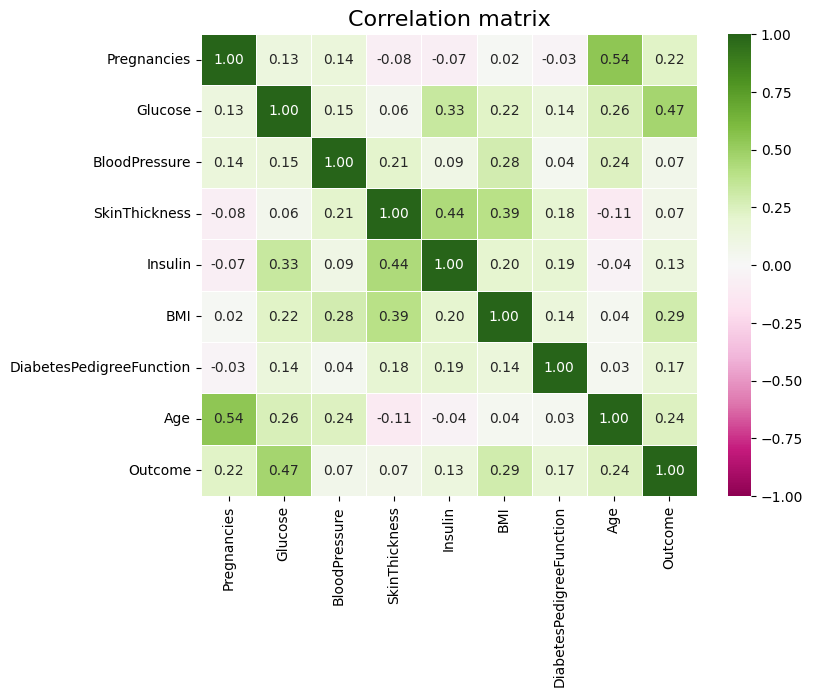

In [29]:
def gen_correlation_report(cdf, report_name, cmap=False):
    if os.path.isfile(report_name):
        print(f"The file '{report_name}' already exists.")
    else:
        profile = ProfileReport(cdf.df, title="Diabetes Profiling Report")
        profile.to_file(output_file=report_name)
        # display(HTML(file_name))

    # Access correlation matrix
    correlation_matrix = cdf.df.corr()
    print(correlation_matrix)

    if(cmap != False):
        # Heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

        plt.title('Correlation matrix', fontsize=16)
        plt.show()

gen_correlation_report(cdfd, "./reports/Diabetes_Profiling_Report.html", SEABORN_COLORMAPS.PiYG.value)

From the previous report, it is possible to determine that the likelihood of having diabetes is most influenced by glucose and BMI. Therefore, these three characteristics will be used for training the model.

## 8.3 Informe de correlación de características de Alzheimer

The file './reports/Alzheimer_Profiling_Report.html' already exists.
          Group       M/F       Age      EDUC       SES      MMSE       CDR      eTIV      nWBV       ASF
Group  1.000000  0.267781 -0.052000 -0.251761  0.164715 -0.611906  0.857218 -0.026625 -0.327277  0.020529
M/F    0.267781  1.000000 -0.063567  0.043633 -0.027069 -0.181244  0.205445  0.559698 -0.224322 -0.549123
Age   -0.052000 -0.063567  1.000000 -0.049768 -0.005012  0.045243 -0.033968  0.039135 -0.488989 -0.027714
EDUC  -0.251761  0.043633 -0.049768  1.000000 -0.733018  0.194574 -0.171576  0.257431  0.023647 -0.241982
SES    0.164715 -0.027069 -0.005012 -0.733018  1.000000 -0.135219  0.086957 -0.289781  0.048502  0.282657
MMSE  -0.611906 -0.181244  0.045243  0.194574 -0.135219  1.000000 -0.703969 -0.033561  0.370782  0.044231
CDR    0.857218  0.205445 -0.033968 -0.171576  0.086957 -0.703969  1.000000  0.009362 -0.350542 -0.016556
eTIV  -0.026625  0.559698  0.039135  0.257431 -0.289781 -0.033561  0.009362  1.0000

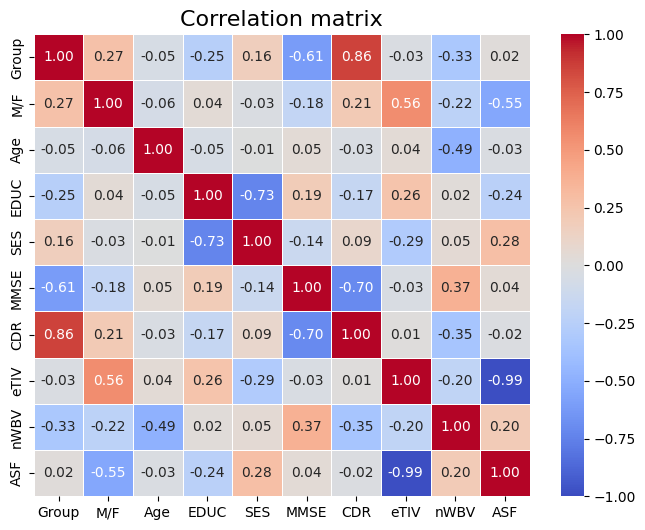

In [30]:
gen_correlation_report(cdfa, "./reports/Alzheimer_Profiling_Report.html", SEABORN_COLORMAPS.Coolwarm.value)

Del informe anterior se desprende que la probabilidad de **padecer Alzheimer está más influenciada por la CDR y el sexo**, por lo que se utilizarán estas tres características para entrenar el modelo.

# 9. Reducción de dimensionalidad

In [31]:
columns_to_keep = ['Glucose', 'BMI', 'Outcome']
cdfd.reduce_dimesionality(columns_to_keep)

columns_to_keep = ['M/F', 'CDR', 'Group']
cdfa.reduce_dimesionality(columns_to_keep)

cdfd.show()
cdfa.show()

./data/diabetes.csv
     Glucose   BMI  Outcome
0        119  32.4        1
1         97  18.2        0
2        180  42.0        1
3        136   0.0        0
4        113  33.3        1
..       ...   ...      ...
763      175  33.6        1
764      113  31.0        0
765      111  30.1        0
766       98  34.0        0
767      144  33.9        0

[768 rows x 3 columns]
Column types:
Glucose                        int64
BMI                            float64
Outcome                        int64

Tags: [1 0]


./data/alzheimer.csv
     M/F  CDR  Group
0      1  0.5      1
1      1  0.0      0
2      0  0.0      0
4      0  0.5      1
6      0  0.5      1
..   ...  ...    ...
368    0  0.0      0
369    1  0.0      0
370    1  0.5      1
371    0  0.0      0
372    0  0.0      0

[336 rows x 3 columns]
Column types:
M/F                            int64
CDR                            float64
Group                          int64

Tags: [1 0]




# 10. División del dataframe

## 10.1 Diatabetes dataframes

In [32]:
def tvt_df_split(df):
    train_df, aux_df = train_test_split(df, test_size=0.3, random_state=SCIKIT_LEARN_RANDOM_STATE)
    validation_df, test_df = train_test_split(aux_df, test_size=0.5, random_state=SCIKIT_LEARN_RANDOM_STATE)

    train_df = train_df.copy()
    validation_df = validation_df.copy()
    test_df = test_df.copy()

    return train_df, validation_df, test_df

# Diabetes custom dataframes
train_dfd, validation_dfd, test_dfd = tvt_df_split(cdfd.df)

train_cdfd = Custom_Dataframe(name="Diabetes Training Custom Dataframe", df=train_dfd, tag_col_name=cdfd.tag_col_name, features_col_names=cdfd.features_col_names)
validation_cdfd = Custom_Dataframe(name="Diabetes Validation Custom Dataframe", df=validation_dfd, tag_col_name=cdfd.tag_col_name, features_col_names=cdfd.features_col_names)
test_cdfd = Custom_Dataframe(name="Diabetes Testing Custom Dataframe", df=test_dfd, tag_col_name=cdfd.tag_col_name, features_col_names=cdfd.features_col_names)

train_cdfd.show()
validation_cdfd.show()
test_cdfd.show()

Diabetes Training Custom Dataframe
     Glucose   BMI  Outcome
264       77  33.3        0
148      167  37.6        1
145      128  30.5        1
348       90  37.7        0
729       90  28.0        0
..       ...   ...      ...
321      143  30.1        0
323      121  39.1        0
392      141  32.4        0
394      138  36.3        1
146       95  37.4        1

[537 rows x 3 columns]
Column types:
Glucose                        int64
BMI                            float64
Outcome                        int64

Tags: [0 1]


Diabetes Validation Custom Dataframe
     Glucose   BMI  Outcome
62       146  29.7        0
581      117  25.2        0
709      146  40.5        0
214      108  32.4        1
343       83  34.3        0
..       ...   ...      ...
242      180  59.4        1
305      181  43.3        1
480      177  34.6        1
574      184  30.0        1
638      112  39.4        0

[115 rows x 3 columns]
Column types:
Glucose                        int64
BMI            

## 10.2 Alzheimer dataframes

In [39]:
# Alzheimer custom dataframes
train_dfa, validation_dfa, test_dfa = tvt_df_split(cdfa.df)

train_cdfa = Custom_Dataframe(name="Alzheimer Training Custom Dataframe", df=train_dfa, tag_col_name=cdfa.tag_col_name, features_col_names=cdfa.features_col_names)
validation_cdfa = Custom_Dataframe(name="Alzheimer Validation Custom Dataframe", df=validation_dfa, tag_col_name=cdfa.tag_col_name, features_col_names=cdfa.features_col_names)
test_cdfa = Custom_Dataframe(name="Alzheimer Testing Custom Dataframe", df=test_dfa, tag_col_name=cdfa.tag_col_name, features_col_names=cdfa.features_col_names)

train_cdfa.show()
validation_cdfa.show()
test_cdfa.show()

Alzheimer Training Custom Dataframe
     M/F  CDR  Group
244    1  0.0      0
91     1  0.5      1
117    0  0.0      0
2      0  0.0      0
262    1  0.0      0
149    0  0.0      0
305    0  0.0      0
156    1  0.5      1
272    1  0.0      0
328    0  0.5      1
279    0  0.0      0
75     0  0.0      0
349    1  0.0      0
330    1  1.0      1
281    0  0.0      0
154    1  1.0      1
286    0  0.0      0
282    1  0.0      0
116    1  0.5      1
192    1  0.0      0
90     1  0.0      0
253    0  1.0      1
18     0  0.0      0
30     0  0.0      0
249    0  0.0      0
172    1  0.0      0
307    0  0.0      0
125    0  0.5      1
32     1  0.5      1
104    1  0.0      0
208    1  0.0      0
176    0  0.0      0
61     0  0.0      0
204    0  1.0      1
122    0  0.0      0
241    0  0.0      0
62     0  0.0      0
271    1  0.5      1
236    1  1.0      1
52     1  0.5      1
181    0  0.5      1
59     0  0.0      0
135    1  0.0      0
216    0  0.5      1
255    1  0.5      

# 11. KNN

## 11.1 KNN para el dataframe de diabetes

In [34]:
for k in range(1, 40, 2):
    knn_d = KNeighborsClassifier(n_neighbors=k)

    # Training
    x_train = train_cdfd.df[train_cdfd.features_col_names]
    y_train = train_cdfd.df[train_cdfd.tag_col_name]

    # Validation
    x_true = validation_cdfd.df[validation_cdfd.features_col_names]
    y_true = validation_cdfd.df[validation_cdfd.tag_col_name]

    # Train
    knn_d.fit(x_train, y_train)
    # Validation
    y_pred = knn_d.predict(x_true)

    # Scores
    print(f"---( k = {k} )---")
    print_scores(y_true=y_true, y_pred=y_pred)

---( k = 1 )---
Accuracy: 0.73
Precision: 0.68
Recall: 0.58
F1 Score: 0.63

---( k = 3 )---
Accuracy: 0.75
Precision: 0.69
Recall: 0.64
F1 Score: 0.67

---( k = 5 )---
Accuracy: 0.81
Precision: 0.83
Recall: 0.64
F1 Score: 0.72

---( k = 7 )---
Accuracy: 0.76
Precision: 0.74
Recall: 0.58
F1 Score: 0.65

---( k = 9 )---
Accuracy: 0.73
Precision: 0.71
Recall: 0.53
F1 Score: 0.61

---( k = 11 )---
Accuracy: 0.73
Precision: 0.71
Recall: 0.53
F1 Score: 0.61

---( k = 13 )---
Accuracy: 0.73
Precision: 0.72
Recall: 0.51
F1 Score: 0.60

---( k = 15 )---
Accuracy: 0.73
Precision: 0.73
Recall: 0.49
F1 Score: 0.59

---( k = 17 )---
Accuracy: 0.74
Precision: 0.74
Recall: 0.51
F1 Score: 0.61

---( k = 19 )---
Accuracy: 0.73
Precision: 0.73
Recall: 0.49
F1 Score: 0.59

---( k = 21 )---
Accuracy: 0.75
Precision: 0.77
Recall: 0.51
F1 Score: 0.61

---( k = 23 )---
Accuracy: 0.75
Precision: 0.77
Recall: 0.51
F1 Score: 0.61

---( k = 25 )---
Accuracy: 0.77
Precision: 0.83
Recall: 0.53
F1 Score: 0.65

---(

Aunque k = 5 tiene un mayor recall y un F1 Score marginalmente superior, **k = 37 ofrece una mejor precisión y una estabilidad general superior del modelo**. La elección de k = 37 es preferible si la precisión es más importante y se busca un modelo que sea menos sensible a las variaciones del conjunto de datos de entrenamiento, proporcionando así un rendimiento más confiable en general.

## 11.2 KNN para el dataframe de alzheimer

In [38]:
# Ajustar la opción para mostrar más filas en DataFrame
pd.set_option('display.max_rows', 800)

# Mostrar los DataFrames de entrenamiento y validación
train_cdfa.show()
validation_cdfa.show()

# Definir el rango de k para el loop
for k in range(1, 40, 2):
    # Crear el clasificador KNN con el número de vecinos k
    knn_d = KNeighborsClassifier(n_neighbors=k)
    
    # Preparar los datos de entrenamiento y validación
    x_train = train_cdfa.df[train_cdfa.features_col_names]
    y_train = train_cdfa.df[train_cdfa.tag_col_name]
    x_true = validation_cdfa.df[validation_cdfa.features_col_names]
    y_true = validation_cdfa.df[validation_cdfa.tag_col_name]
    
    # Entrenar el modelo
    knn_d.fit(x_train, y_train)
    
    # Realizar predicciones en el conjunto de validación
    y_pred = knn_d.predict(x_true)
    
    # Imprimir las predicciones (asegúrate de que U.printt esté definido o usa print)
    print(f"y_pred (k={k}): {y_pred}")
    
    # Evaluar y mostrar las métricas del modelo
    print(f"---( k = {k} )---")
    print_scores(y_true=y_true, y_pred=y_pred)


Alzheimer Training Custom Dataframe
     M/F  CDR  Group
104    1  0.0      0
36     0  0.0      0
27     0  0.0      0
319    0  0.5      1
330    1  1.0      1
64     0  0.0      0
193    1  0.0      0
12     1  0.5      1
243    1  1.0      1
270    0  0.0      0
91     1  0.5      1
168    1  0.0      0
46     1  0.5      1
261    1  0.5      1
116    1  0.5      1
170    1  0.0      0
213    0  1.0      1
351    1  0.0      0
226    0  0.0      0
138    1  0.5      1
76     1  0.5      1
301    0  2.0      1
22     0  0.0      0
216    0  0.5      1
177    0  0.0      0
221    1  1.0      1
23     1  0.0      0
253    0  1.0      1
102    0  0.5      1
79     0  0.5      1
228    0  1.0      1
108    1  0.5      1
109    1  0.0      0
186    0  0.0      0
78     0  0.0      0
28     1  0.0      0
44     1  0.5      1
273    0  0.0      0
77     1  0.5      1
297    0  0.0      0
159    0  0.5      1
137    0  0.0      0
192    1  0.0      0
96     0  0.0      0
316    0  0.0      